
# GRUPO GO CODE FIAP 
INTEGRANTES: 

1.   Rafael Santis RM 86981

2.   Catarina Henriques RM 87553

1.   Thiago kenzo RM 87150

2.   Gustavo Orlando RM 89053

1.   João Pedro Otoni RM87894




In [ ]:
from google.colab import drive
import tensorflow
import cv2,os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# caminho do arquivo via google drive
data_path='/content/drive/MyDrive/horse-or-human/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
# o dicionário vai estar vazio
label_dict=dict(zip(categories,labels)) 
print(label_dict)
print(categories)
print(labels)

{'horses': 0, 'humans': 1}
['horses', 'humans']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #redimensionando a imagem para 100x100
            data.append(resized)
            target.append(label_dict[category])
            # Juntando a imagem ao rótulo
        except Exception as e:
            print('Exception:',e)
            # Se tivesse excessão ia printar aq , mas nn teve excessão

In [ ]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

(1027, 2)

In [ ]:
data.shape

(1027, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#primeira camada da rede neural com relu e maxpooling
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#fazer mais um relu e maxpooling
#achei esse flatten no google , usei para tentar melhorar acurácia
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
#achei essa softmax no google , vi que é boa para reconhecimento de objetos/imagens.
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

In [22]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [23]:
train_data.shape

(924, 100, 100, 3)

In [24]:
train_target.shape

(924, 2)

In [26]:
history=model.fit(train_data,train_target,epochs=600,validation_split=0.2)
# esse split peguei do google também , serve pra separar strings e transformar num tipo de lista.
# Coloquei 600 epochs buscando aumentar a acurácia , mas percebi que logo após rodar as primeiras 15 epochs,
# o resultado da acurácia manteve-se em 1.0 na maioria das epochs dali pra baixo , acredito que a rede esteja um pouco
# overfitada , mas nn tenho certeza. 


Epoch 1/600
24/24 [==============================] - 12s 84ms/step - loss: 0.8571 - accuracy: 0.6766 - val_loss: 0.3139 - val_accuracy: 0.8973
Epoch 2/600
24/24 [==============================] - 1s 48ms/step - loss: 0.1974 - accuracy: 0.9283 - val_loss: 0.2753 - val_accuracy: 0.8973
Epoch 3/600
24/24 [==============================] - 1s 49ms/step - loss: 0.1134 - accuracy: 0.9581 - val_loss: 0.0614 - val_accuracy: 0.9730
Epoch 4/600
24/24 [==============================] - 1s 41ms/step - loss: 0.0602 - accuracy: 0.9770 - val_loss: 0.1693 - val_accuracy: 0.9459
Epoch 5/600
24/24 [==============================] - 1s 43ms/step - loss: 0.0655 - accuracy: 0.9783 - val_loss: 0.0480 - val_accuracy: 0.9730
Epoch 6/600
24/24 [==============================] - 1s 42ms/step - loss: 0.0236 - accuracy: 0.9932 - val_loss: 0.0226 - val_accuracy: 0.9946
Epoch 7/600
24/24 [==============================] - 1s 41ms/step - loss: 0.0304 - accuracy: 0.9865 - val_loss: 0.0930 - val_accuracy: 0.9730
Epoch

In [ ]:
model.save('model.h5')
#salvar o modelo pra "consumir" no flask

In [51]:
#defini 4 váriaveis com os respectivos valores acima. 
# Tentei plotar elas no gráfico abaixo mas acabou não rolando , nn sei porque.
loss = 8.3882
accuracy = 1.0000
val_loss = 0.0725
val_accuracy = 0.9946


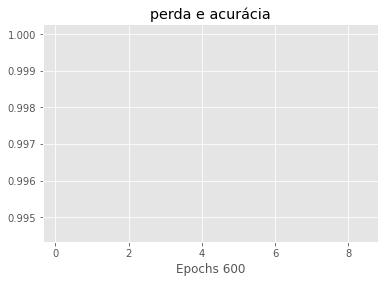

In [61]:
plt.plot(loss, accuracy, val_loss, val_accuracy)
plt.title("perda e acurácia")
plt.xlabel("Epochs 600")
plt.show()

Refêrencias usadas no CP2.

https://www.kdnuggets.com/2020/08/tensorflow-model-regularization-techniques.html



https://www.edureka.co/community/77292/what-is-h5-model-in-keras


https://medium.com/@araujo.dionata/google-colab-importando-arquivos-direto-do-google-drive-5c0fc2798480


https://www.brutalk.com/ru/brutalk-blog/view/funcao-de-ativacao-softmax-com-python-6046b4a524fbc#:~:text=Softmax%20%C3%A9%20uma%20fun%C3%A7%C3%A3o%20matem%C3%A1tica,de%20cada%20valor%20no%20vetor.


https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

